# 1D Heisenberg J1J2J3 model (1st set): Convergence curves

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_meanE(ax, Ee, e_list,last_saved_epoch, e_names, j23, frange, legend_loc):
    for i in range(len(e_list)):
        ax.plot(np.arange(len(e_list[i])), np.real(e_list[i]),color = color_l[i], label = e_names[i])
    ax.axvline(x=last_saved_epoch[0],  ymax=0.5, color=color_l[0], linestyle='--', linewidth=2, label='eGRU_bm')
    ax.axvline(x=last_saved_epoch[1], ymax=0.5, color=color_l[1], linestyle='--', linewidth=2, label='hGRU_bm')
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",fontsize = 15)
    ax.legend(loc='best')
    
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_var(ax, v_list, e_names, j23, frange, legend_loc):
    for i in range(len(v_list)):
        ax.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylim(-5, 45)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",
              fontsize = 15)
    ax.legend(loc='best')

In [4]:
fname = '../results_s1'
###################################### (J2, J3) = (0.0, 0.5) #######################################
mE00_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE00_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh00_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh00_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.2, 0.2) #######################################
mE02_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE02_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh02_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.2, 0.5) #######################################
mE02_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE02_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh02_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.5, 0.2) #######################################
mE05_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE05_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh05_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh05_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

In [5]:
E_00_05 = -15.890276367
E_02_02 = -12.943044355
E_02_05 = -14.640825798
E_05_02 = -11.528738924

#Last saved epoch corresponding to the best model
#The matrix below has the form : (eGRU, hGRU) as columns, (J2,J3)=(0.0,0.5), (0.2,0.2), (0.2,0.5), (0.5,0.2) as rows
#Data from training notebooks 
bm = np.array([[255,279],[256,242],[126,261],[252,272]])
print('Last saved epochs with best models for J1J2J3 experiments set 1')
print(f'For (J2,J3)=(0.0,0.5), best model for eGRU is saved at epoch {bm[0,0]}/280, for hGRU is at {bm[0,1]}/280')
print(f'For (J2,J3)=(0.2,0.2), best model for eGRU is saved at epoch {bm[1,0]}/280, for hGRU is at {bm[1,1]}/280')
print(f'For (J2,J3)=(0.2,0.5), best model for eGRU is saved at epoch {bm[2,0]}/280, for hGRU is at {bm[2,1]}/280')
print(f'For (J2,J3)=(0.5,0.2), best model for eGRU is saved at epoch {bm[3,0]}/280, for hGRU is at {bm[3,1]}/280')


Last saved epochs with best models for J1J2J3 experiments set 1
For (J2,J3)=(0.0,0.5), best model for eGRU is saved at epoch 255/280, for hGRU is at 279/280
For (J2,J3)=(0.2,0.2), best model for eGRU is saved at epoch 256/280, for hGRU is at 242/280
For (J2,J3)=(0.2,0.5), best model for eGRU is saved at epoch 126/280, for hGRU is at 261/280
For (J2,J3)=(0.5,0.2), best model for eGRU is saved at epoch 252/280, for hGRU is at 272/280


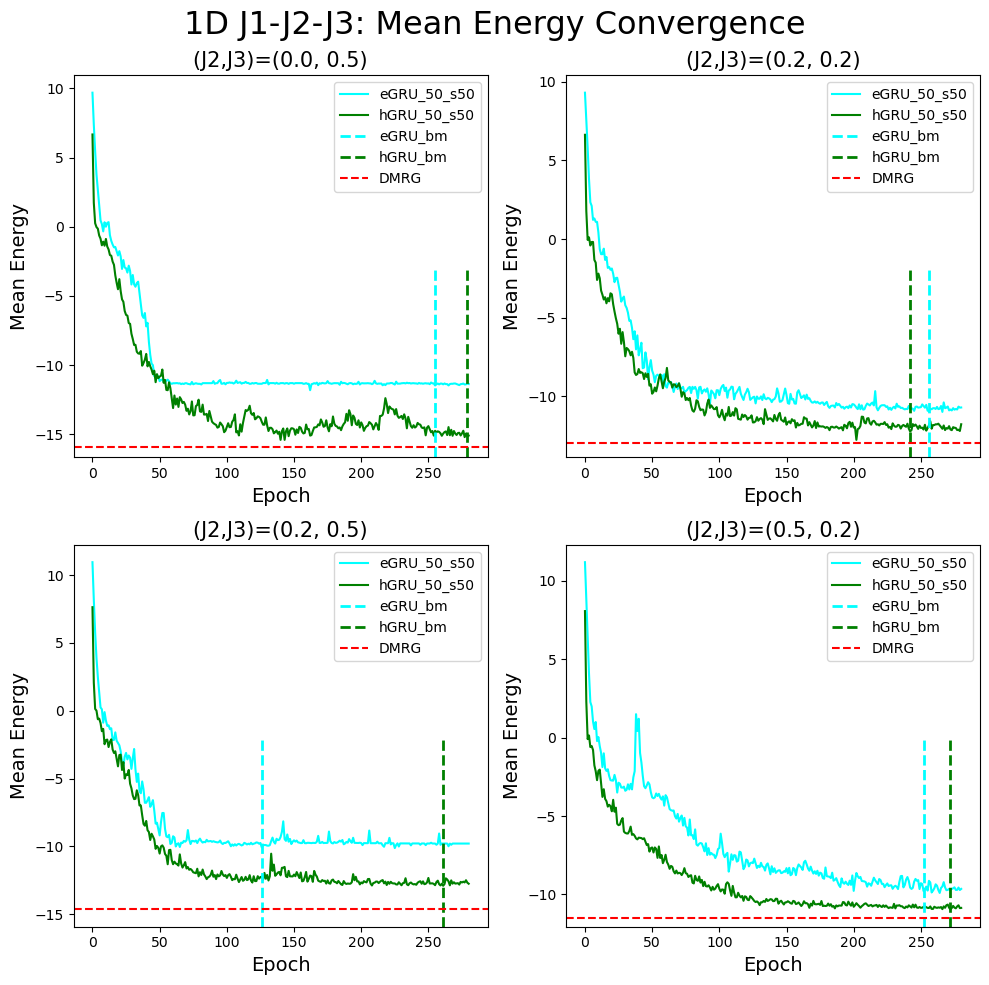

In [6]:
fig, ax = plt.subplots(2,2, figsize=(10, 10), tight_layout=True)
e_names = ['eGRU_50_s50',  'hGRU_50_s50']
e_list00_05 = [mE00_05, mEh00_05]
e_list02_02 = [mE02_02,  mEh02_02]
e_list02_05 = [mE02_05, mEh02_05]
e_list05_02 = [mE05_02, mEh05_02]

plot_res_meanE(ax[0,0], E_00_05, e_list00_05, bm[0], e_names, [0.0, 0.5], [100,290, E_00_05-0.5, E_00_05+3.5], (0.15, 0.38, 0.8, 0.2))
plot_res_meanE(ax[0,1], E_02_02, e_list02_02, bm[1], e_names, [0.2,0.2], [100,290, E_02_02-0.2, E_02_02+3.], (0.15, 0.38, 0.8, 0.2))
plot_res_meanE(ax[1,0], E_02_05, e_list02_05, bm[2], e_names, [0.2,0.5], [100,290, E_02_05-0.5, E_02_05+4.5], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,1], E_05_02, e_list05_02, bm[3], e_names, [0.5, 0.2], [100,290,E_05_02-0.5, E_05_02+4.5], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D J1-J2-J3: Mean Energy Convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30.png')

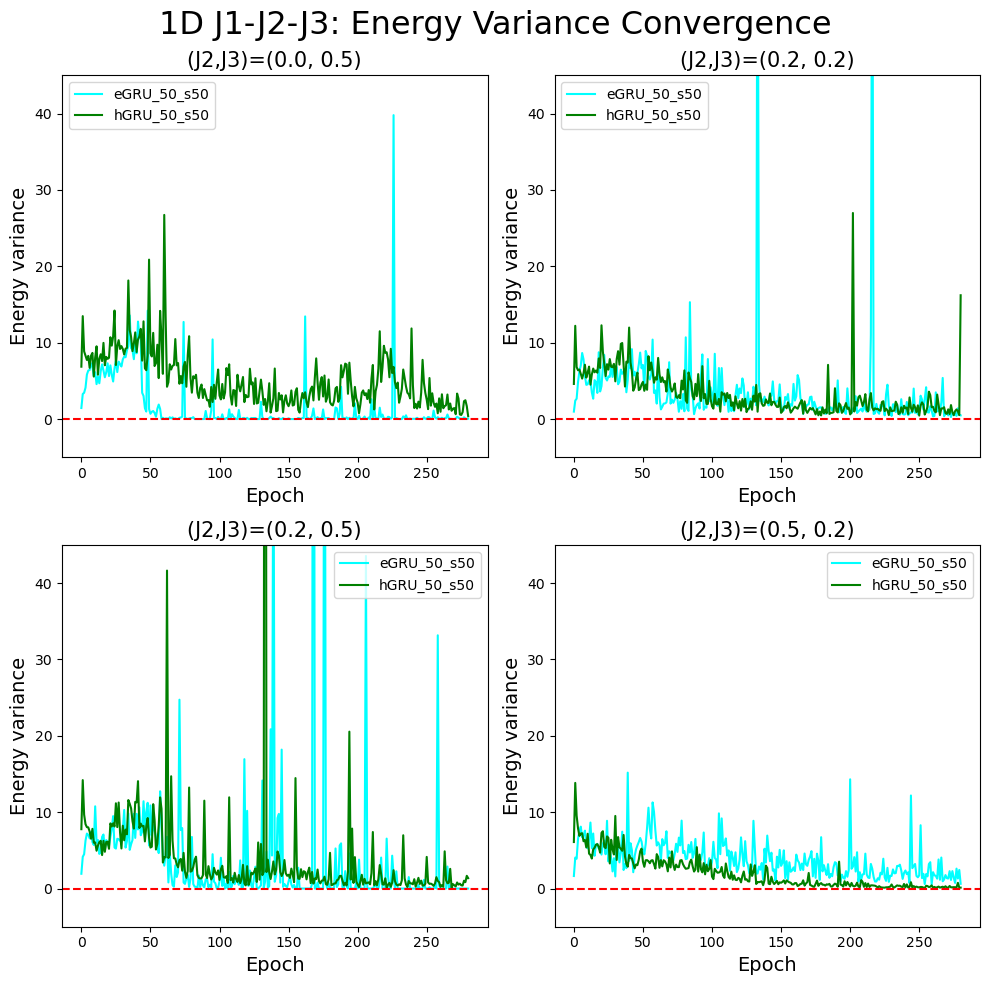

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10, 10), tight_layout=True)

e_names = ['eGRU_50_s50',  'hGRU_50_s50']
e_list00_05 = [vE00_05, vEh00_05]
e_list02_02 = [vE02_02, vEh02_02]
e_list02_05 = [vE02_05, vEh02_05]
e_list05_02 = [vE05_02, vEh05_02]

plot_res_var(ax[0,0], e_list00_05, e_names, [0.0, 0.5], [100,290, -0.5, 3.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[0,1], e_list02_02, e_names, [0.2,0.2], [100,290, -0.2, 3.], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1,0],  e_list02_05, e_names, [0.2,0.5], [100,290, -0.5, 4.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1,1], e_list05_02, e_names, [0.5, 0.2], [100,290,-0.5, 2.5], (0.15, 0.75, 0.3, 0.2))

plt.suptitle('1D J1-J2-J3: Energy Variance Convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30-var.png')